In [42]:
import numpy as np, os
import pandas as pd
import tensorflow as tf
from tensorflow import keras as tfk
from tfomics import tfomics
from tfomics.tfomics import explain
import logomaker

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [73]:
N, L, A = 50, 101, 4
x = np.eye(A)[np.random.randint(0,A, (N, L))]
model = tfk.Sequential([tfk.layers.Input((L, A), name='input'),
                        tfk.layers.Conv1D(filters=32, kernel_size=19, padding='same'),
                       tfk.layers.BatchNormalization(),
                       tfk.layers.Activation('relu'), 
                       tfk.layers.MaxPool1D(25),
                       tfk.layers.Flatten(),
                       tfk.layers.Dense(64, activation='relu'),
                       tfk.layers.Dense(1, name='logits'),
                       tfk.layers.Activation('sigmoid', name='output')], name='deepbind')

In [74]:
explainer = explain.Explainer(model, class_index=0)
x_mut = explainer.mutagenesis(x)
x_mut.shape, x.shape

((50, 101, 4), (50, 101, 4))

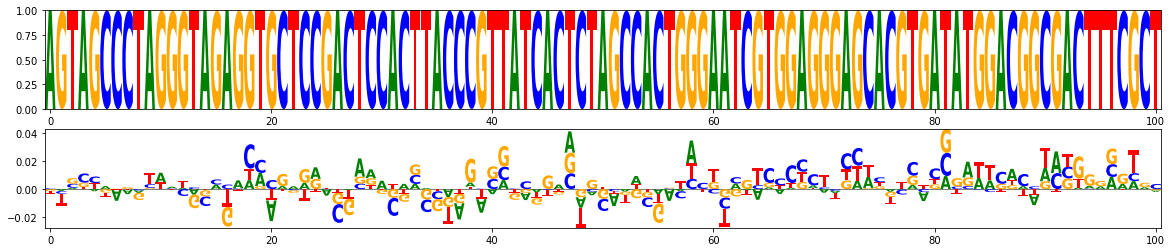

In [45]:
fig = plt.figure(figsize=(20, 4))
ax1, ax2 = fig.add_subplot(211), fig.add_subplot(212)
l1 = logomaker.Logo(pd.DataFrame(data=x[0], columns=list('ACGT')), ax=ax1)
l2 = logomaker.Logo(pd.DataFrame(data=x_mut[0], columns=list('ACGT')), ax=ax2)

In [78]:
x_ = x[0][None, :, :]
x_mut = []
for l in range(L):
    for a in range(A):
        x_new = np.copy(x_)
        x_new[0,l,:] = 0
        x_new[0,l,a] = 1
        x_mut.append(x_new)
x_mut = np.concatenate(x_mut, axis=0)

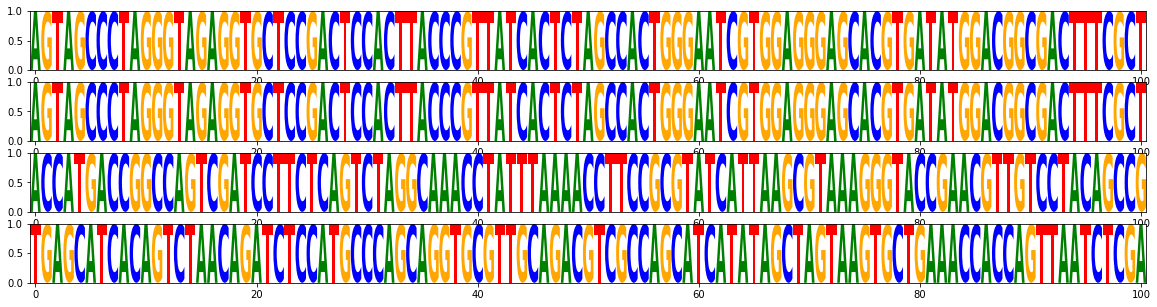

In [65]:
fig = plt.figure(figsize=(20, 5))
ax1, ax2, ax3, ax4 = fig.add_subplot(411), fig.add_subplot(412), fig.add_subplot(413), fig.add_subplot(414)
l1 = logomaker.Logo(pd.DataFrame(data=x[0], columns=list('ACGT')), ax=ax1)
l2 = logomaker.Logo(pd.DataFrame(data=x_mut[0], columns=list('ACGT')), ax=ax2)
l2 = logomaker.Logo(pd.DataFrame(data=x_mut[1], columns=list('ACGT')), ax=ax3)
l3 = logomaker.Logo(pd.DataFrame(data=x_mut[2], columns=list('ACGT')), ax=ax4)

In [90]:
model.predict(x[:2])[:,0]

array([0.41425523, 0.44987684], dtype=float32)